# Preliminares

### Aproximación del gradiente
Para calcular el gradiente de una función $f:\mathbb{R}^n\rightarrow\mathbb{R}$ utilizamos *diferencias centradas*, es decir, si denotamos por $\nabla f^*$ a la aproximación de $\nabla f$ tenemos que las entradas de la aproximación, denotadas por $\nabla f^*_i$ para $i=1,2,\ldots_,n$ serán

$$f^*_i(x)=\frac{f(x+\varepsilon e_i)-f(x-\varepsilon e_i)}{2\varepsilon}$$ 

donde $e_i\in\mathbb{R}^n$ tal que la $i$-ésima entrada es $1$ y el resto cero, es decir, 

$$e_1=(1,0,0,\ldots,0)\\e_2=(0,1,0,\ldots,0)\\\vdots\\e_n=(0,0,0,\ldots,1);$$ 

y $\varepsilon$ es una cantidad muy pequeña. Usualmente tomaremos $\varepsilon = 10^{-4}$.

In [1]:
%run grad.py

### Aproximación de la matriz Hessiana
Recordemos que para una función $f:\mathbb{R}^n\rightarrow\mathbb{R}$ de clase $\mathcal{C}^2$ se define la matriz Hessiana que resulta de tomar las segundas derivadas de la función y colocarlas dentro de una matriz como sigue 

$$
(\mathbf{H}f)(x)_{ij}= \frac{\delta^2f}{\delta x_i\delta x_j}(x).
$$

Tomaremos la aproximación, denotada por $(\mathbf{H}f)^*$, de la matriz Hessiana de $f$ como sigue

$$
(\mathbf{H}f)^*_{ij}(x)=\frac{fx_{ij}-fx_{i}-fx_{j}+f(x)}{\varepsilon^2}
$$

donde $fx_{ij}=f\left(x+\varepsilon \left(e_i+e_j\right)\right)$ y $fx_i = f\left(x+\varepsilon e_i\right)$, cada vez que $i\neq j$. Para el caso de los elementos en la diagonal de la matriz Hessiana, utilizaremos la aproximación con *diferencias centradas*:

$$
(\mathbf{H}f)^*_{ii}(x) = \frac{fx_i - 2f(x) + fx_i^-}{\varepsilon^2}
$$

donde $fx_i^- = f(x-\varepsilon e_i)$.

Otra manera de encontrar una aproximación de la matriz Hessiana es aplicar el algoritmo de para encontrar los gradientes de cada columna, pues recordemos que la matriz hessiana es la matriz **Jacobiana** del vector gradientes, es decir, $(\mathbf{H}f)(x) = \mathbf{J}(\nabla f)(x)$. En el archivo `hess.py` está ambas funciones con los nombres `hess` y `hess_grad`, respectivamente.

In [2]:
%run hess.py

### Condiciones de optimalidad
Si $x^\star$ es el punto donde $f$ alcanza el mínimo se debe satisfacer que:

$$
\nabla f(x^\star)=0 \qquad\text{y}\qquad \nabla^2 f (x^\star) \text{ es positiva definida}
$$

In [3]:
%run first_condition.py

### Función de Rosenbrock
Para testear los algoritmos previamente cargados en este *notebook*, utilizaremos la **función de Rosenbrock** que está definida por 

$$f(x,y)=(a-x)^2+b\left(y-x^2\right)^2$$

donde $a,b\in\mathbb{R}$ fijos. Es bien sabido que la función tiene un mínimo global en el punto $(x,y)=\left(a,a^2\right)$ para el que tenemos $f(x,y)=0$.

El archivo `rosenbrock.py` se codifica la función de Rosenbrock y por *default* se tienen los parámetros $a=1$ y $b=100$.

In [4]:
%run rosenbrock.py

# Algoritmos
Considere el siguiente problema de minimización

$$
\min_{x\in\mathbb{R}^n} f(x).
$$

donde $f:\mathbb{R}^n \rightarrow \mathbb{R}$ es una función suave (al menos de clase $\mathcal{C}^2$). Tomemos un punto inicial $x_0\in\mathbb{R}^n$ y se genera una secuencia de puntos $\{x_k\}_{k=0}^\infty$ de forma iterada (de acuerdo a cada algoritmo). Esa secuencia será truncada cada vez que el progreso hacia el mínimo global que se busca sea completamente marginal. La decisión de pasar de un punto $x_k$ a $x_{k+1}$ será basada en el comportamiento de la misma función $f$ y, en algunos casos, de los puntos anteriores $x_0, x_1, \ldots, x_{k-1}$. Cada iteración deberá acercarse cada vez más al mínimo de la función, es decir, los valores $f(x_k)$ serán decrecientes en cada iteración. Por lo tanto, 

$$
f(x_k)<f(x_{k-m})
$$

después de $m$ iteraciones.

## Búsqueda de línea

Este esquema de búsqueda se basa en escoger una dirección de descenso $p_k$ y un tamaño de paso $\alpha_k$ para cada iteración $x_k$ para disminuir los valores de $f$. La distancia sobre la cual nos moveremos a través de la dirección $p_k$ será aquella que resuelva el problema unidimensional de minimización para hallar la longitud del paso:

$$
\min_{\alpha>0}f(x+\alpha p)
$$

A continuación se describen los algoritmos. Para la evaluación de efectividad, probaremos cada algoritmo en la función de **Rosenbrock** y tomaremos dos puntos iniciales: uno relativamente cercano al objetivo $(0,2)$ y otro relativamente lejano al mismo $(20,25)$.

## Algoritmo de Newton

El algoritmo de Newton propone que la dirección de descenso sea tomada como:

$$
p_k^N= -\left(\nabla^2f_k\right)\nabla f_k
$$

donde los índices $k$ representan la evaluación de la matriz Hessiana o el gradiente de $f$ en la iteración $x_k$.

In [5]:
%run newton.py

### `newton_fixed_step_method`

Una vez seleccionada la dirección de descenso, nos queda seleccionar la longitud de paso sobre la que se dirigirá la nueva iteración $x_{k+1}$. Para esta función tomaremos un paso fijo $\alpha_k=0.5$. Notemos que el resultado satisface las condiciones de optimalidad.

In [6]:
OPT1_near = newton_fixed_step_method(rosenbrock, [0,2])
OPT1_far = newton_fixed_step_method(rosenbrock, [20,25])
print(OPT1_near)
print(OPT1_far)

[array([0.9999995 , 0.99999898]), 2.9584686631590705e-13, 38]
[array([1.00000028, 1.00000055]), 9.876350349030624e-14, 92]


In [7]:
print(optimal_test(rosenbrock, OPT1_near[0]),
      optimal_test(rosenbrock, OPT1_far[0]))

True True


### `newton_BLS_method`
En este algoritmo se modifica el tamaño del paso de tal modo que se satisfagan la condición de *Armijo*:

$$
f(x_k + \alpha p_k) \leq f(x_k) + c_1\alpha\nabla f_k^Tp_k
$$

donde fijamos el valor de $c_1$ a `1e-4`.

In [8]:
%run line_search.py
OPT2_near = newton_BLS_method(rosenbrock, [10,10])
OPT2_far = newton_BLS_method(rosenbrock, [20,25])
print(OPT2_near)
print(OPT2_far)

[array([ 6.37975236, 40.73626102]), 29.064381462422435, 10000]
[array([1.00000001, 1.00000003]), 1.9317811883317952e-16, 46]


In [9]:
print(optimal_test(rosenbrock, OPT2_near[0]),
      optimal_test(rosenbrock, OPT2_far[0]))

Gradient is not zero
False True


### `newton_modHes_method`
En algunos casos, la dirección de Newton $p_k^N$ no será la mejor dirección de descenso en aquellos casos cuando la matriz Hessiana $\nabla^2f_k$ no sea positiva definida. En aquellos casos, tomaremos una modificación a la misma para obtener una matriz "similar" a la Hessiana y que siempre sea positiva definida. En este algoritmo, siempre que $\nabla^2f_k$ no sea positiva definida, hecho que será corroborado por los eigenvalores de la matriz (si $A$ es simétrica positiva definida, entonces todos los eigenvalores de $A$ serán positivos), tomaremos una modificación basada en la descomposición de *Cholesky*. La aproximación será tomada como 

$$
B_k = B_k + \tau I
$$

para una $\tau$ apropiada.

In [10]:
%run choleskyHes.py
OPT3_near = newton_modHes_method(rosenbrock, [0,2])
OPT3_far = newton_modHes_method(rosenbrock, [20,25])
print(OPT3_near)
print(OPT3_far)

[array([1.00000012, 1.00000025]), 1.5366353879669056e-14, 10]
[array([  8.66690803, 104.80079936]), 88181.6993831827, 10000]


In [11]:
print(optimal_test(rosenbrock, OPT3_near[0]),
      optimal_test(rosenbrock, OPT3_far[0]))

Gradient is not zero
True False


### `BFGS`
El algoritmo de *Broyden-Flethcer Goldfarb-Shanno*, o más corto, **BFGS**, es un algoritmo iterativo que determina una dirección de descenso ($p_k$) de tal modo que en cada iteración toma aproximación de la matriz Hessiana a partir del método de la secante. Entonces, para una buena aproximación inicial de la matriz Hessiana (ésta puede ser obtenida a partir de cualquier método de aproximación, pero debe arrojar una matriz positiva definida) se tiene la siguiente sucesión de matrices

$$
B_{k+1} = B_k +\frac{\mathbf y_k \mathbf y_k^T}{\mathbf y_k^T \mathbf s_k} - \frac{B_k\mathbf s_k \mathbf s_k^T B_k^T}{\mathbf s_k^T B_k \mathbf s_k}
$$

donde $\mathbf s_k$ se puede interpretar como el vector de descenso y $\mathbf y_k$ resulta de tomar el cambio en la función gradiente.

In [16]:
%run BFGS.py

In [49]:
OPT4_near = BFGS(rosenbrock, [2,2])
OPT4_far = BFGS(rosenbrock, [5,5])
print(OPT4_near)
print(OPT4_far)

[array([1.00000001, 1.00000001]), 1.2665796089728238e-14, 25]
[array([1.00000504, 1.0000101 ]), 2.5421840686179302e-11, 56]


Recordemos que el método *BFGS* es una método derivado de regiones de confianza por lo que el punto inicial debe estar lo suficientemente cercano al punto óptimo.

In [50]:
print(optimal_test(rosenbrock, OPT4_near[0]),
      optimal_test(rosenbrock, OPT4_far[0]))

True True


# Cámaras en la CDMX

In [95]:
import pandas as pd
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt
import numpy as np

La siguiente base de datos contiene información sobre los delitos de la ciudad de México.

In [52]:
datos = pd.read_csv("crime_data.csv")
datos.describe()

lat          long
count  31056.000000  31056.000000
mean      19.393666    -99.130766
std        0.065004      0.060586
min       19.250780    -99.306177
25%       19.345276    -99.175350
50%       19.388652    -99.132440
75%       19.442973    -99.087178
max       19.578350    -98.973727

In [53]:
datos['crime'].value_counts()/datos['crime'].count()

ROBO A TRANSEUNTE C.V.             0.278207
ROBO DE VEHICULO AUTOMOTOR S.V.    0.211489
ROBO A NEGOCIO C.V.                0.114116
ROBO DE VEHICULO AUTOMOTOR C.V.    0.099240
ROBO A REPARTIDOR C.V.             0.058121
ROBO A TRANSEUNTE S.V.             0.048815
HOMICIDIO DOLOSO                   0.033037
VIOLACION                          0.031009
ROBO A BORDO DE METRO S.V.         0.024665
LESIONES POR ARMA DE FUEGO         0.021123
ROBO A REPARTIDOR S.V.             0.018386
ROBO A CASA HABITACION C.V.        0.017774
ROBO A BORDO DE MICROBUS C.V.      0.015424
ROBO A CUENTAHABIENTE C.V.         0.012494
ROBO A BORDO DE TAXI C.V.          0.005506
ROBO A BORDO DE METRO C.V.         0.004894
ROBO A TRANSPORTISTA C.V.          0.002737
ROBO A BORDO DE MICROBUS S.V.      0.002093
SECUESTRO                          0.000708
ROBO A TRANSPORTISTA S.V.          0.000161
Name: crime, dtype: float64

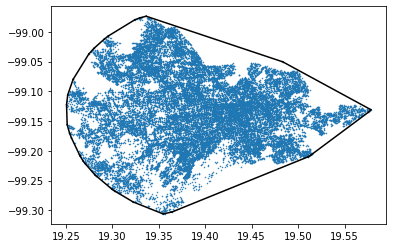

In [54]:
coordenadas = datos[['lat', 'long']].to_numpy()
hull = ConvexHull(coordenadas)
plt.plot(coordenadas[:,0], coordenadas[:,1], 'o', markersize = 0.5, )
for simplex in hull.simplices:
    plt.plot(coordenadas[simplex, 0], coordenadas[simplex, 1], 'k-')
plt.show()

### Función de costos
Se desea colocar la posición de cámaras de tal modo que minimizemos la siguiente función:

$$
f(\mathbf C) = \sum_i \sum_j ||c_i-d_j||^2_2 + \sum_{i< j} \frac{1}{||c_i-c_j||^2_2}
$$

donde $\mathbf C$ es el conjunto de la posición de las cámaras $c_i$ y $d_j$ representa la posición de los delitos.

In [153]:
delitos = (datos[['lat', 'long']].to_numpy())
delitosVector = np.concatenate((delitos[:,0],delitos[:,1]))

def camaras(C, D = delitosVector):
    suma = 0
    reciproco = 0
    n = int(C.size/2)
    m = int(D.size/2)
    for i in range(n):
        for j in range(n):
            suma += np.linalg.norm(np.array([C[i],C[i+n]]) - np.array([D[j], D[j+m]]))
            if i<j:
                reciproco += 1/np.linalg.norm(np.array([C[i],C[i+n]]) - np.array([C[j],C[j+n]]))
                
    return suma + reciproco

Generamos $8000$ puntos aleatorios como punto inicial de nuestra función.

In [158]:
ncams = 10
latbounds = [min(delitos[:,0]), max(delitos[:,0])]
longbounds = [min(delitos[:,1]), max(delitos[:,1])]
cams = np.zeros((ncams,2))
cams[:,0] = np.random.uniform(latbounds[0], latbounds[1], ncams)
cams[:,1] = np.random.uniform(longbounds[0], latbounds[1], ncams)
camarasVector = np.concatenate((cams[:,0], cams[:,1]))

In [ ]:
newton_modHes_method(camaras, camarasVector)

In [ ]:
Los primeros dos algoritmos fallan durante proceso debido al cálculo de la matriz Hessiana (matrices singulares).

## Una posible modificación
De la función objetivo a modificar podemos agregar una modificacón de acuerdo a la proporción de los delitos y la gravedad de ellos.